# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['ages'] = abs(app_train['DAYS_BIRTH'])/365.0

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train.info()
app_train["ages"].describe()
bins=np.linspace(20, 70, num=11)
df1=app_train[~pd.isna(app_train["ages"])][["TARGET", "AMT_INCOME_TOTAL", "ages"]]
df1.describe()
df1["age_group"]= pd.cut(df1["ages"], bins)
df1_age_group=df1.groupby(df1["age_group"], as_index=False).mean()
df1_age_group

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to ages
dtypes: bool(1), float64(67), int32(3), int64(40), object(13)
memory usage: 285.3+ MB


,age_group,TARGET,AMT_INCOME_TOTAL,ages
0,"(20.0, 25.0]",0.123036,145349.196965,23.377522
1,"(25.0, 30.0]",0.111436,164764.078910,27.822518
2,"(30.0, 35.0]",0.102814,178096.685310,32.479037
3,"(35.0, 40.0]",0.089414,179617.542456,37.555913
4,"(40.0, 45.0]",0.078491,181633.860249,42.459346
5,"(45.0, 50.0]",0.074171,179306.475713,47.462741
6,"(50.0, 55.0]",0.066968,171307.989238,52.593136
7,"(55.0, 60.0]",0.055314,158608.647408,57.491131
8,"(60.0, 65.0]",0.052737,144782.885738,62.412459
9,"(65.0, 70.0]",0.037270,118941.066642,66.555108


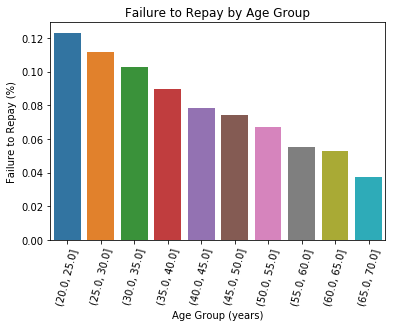

In [6]:
import seaborn as sns
px=df1_age_group["age_group"]
py=df1_age_group["TARGET"]
sns.barplot(px, py)
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [7]:
group_by_age=df1["age_group"].unique()
sns.barplot(df1[df1["age_group"]==group_by_age[2]][])
plt.boxplot(df1[df1["age_group"]==group_by_age[2]]["AMT_INCOME_TOTAL"])

SyntaxError: invalid syntax (<ipython-input-7-70807425c08d>, line 2)

1678          25650.0
20727         25650.0
240137        26100.0
186643        26100.0
246104        26100.0
132707        26460.0
262748        26550.0
175433        26550.0
4735          27000.0
187572        27000.0
292142        27000.0
124146        27000.0
125059        27000.0
10585         27000.0
62585         27000.0
173546        27000.0
83674         27000.0
267037        27000.0
90900         27000.0
277924        27000.0
232535        27000.0
163569        27000.0
133737        27000.0
299307        27000.0
205513        27000.0
162772        27000.0
239654        27000.0
199006        27000.0
36856         27000.0
293194        27000.0
             ...     
29737       2250000.0
74781       2250000.0
71637       2250000.0
81185       2250000.0
55329       2250000.0
10222       2250000.0
278212      2250000.0
206814      2250000.0
201855      2250000.0
145673      2250000.0
298082      2475000.0
258773      2700000.0
107926      2930026.5
101007      3150000.0
248159    

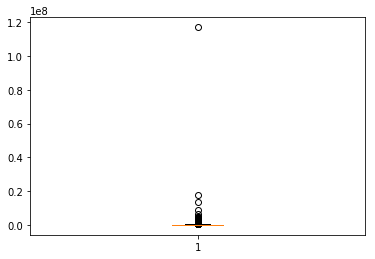

In [8]:
df2= app_train[~pd.isna(app_train["AMT_INCOME_TOTAL"])][["TARGET", "ages", "AMT_INCOME_TOTAL"]]
plt.boxplot(df2["AMT_INCOME_TOTAL"])
df2.sort_values(by= "AMT_INCOME_TOTAL")["AMT_INCOME_TOTAL"]

In [9]:
INCOME_MIN=df2["AMT_INCOME_TOTAL"].min()
INCOME_MAX=df2["AMT_INCOME_TOTAL"].max()
bins=np.linspace(25000, 4500000, num=11)
bins=np.append(bins, 117000000)
print (bins)
df2["INCOME_GROUP"]=pd.cut(df2["AMT_INCOME_TOTAL"], bins)
print (df2["INCOME_GROUP"].value_counts())
df2_INCOME_GROUP=df2.groupby(df2["INCOME_GROUP"], as_index=False).mean()
df2_INCOME_GROUP

[2.5000e+04 4.7250e+05 9.2000e+05 1.3675e+06 1.8150e+06 2.2625e+06
 2.7100e+06 3.1575e+06 3.6050e+06 4.0525e+06 4.5000e+06 1.1700e+08]
(25000.0, 472500.0]         304497
(472500.0, 920000.0]          2738
(920000.0, 1367500.0]          188
(1367500.0, 1815000.0]          39
(1815000.0, 2262500.0]          29
(4500000.0, 117000000.0]         5
(4052500.0, 4500000.0]           4
(3157500.0, 3605000.0]           4
(2710000.0, 3157500.0]           3
(3605000.0, 4052500.0]           2
(2262500.0, 2710000.0]           2
Name: INCOME_GROUP, dtype: int64


,INCOME_GROUP,TARGET,ages,AMT_INCOME_TOTAL
0,"(25000.0, 472500.0]",0.080996,43.945346,1.629924e+05
1,"(472500.0, 920000.0]",0.053689,43.198890,6.254430e+05
2,"(920000.0, 1367500.0]",0.053191,42.338152,1.170869e+06
3,"(1367500.0, 1815000.0]",0.025641,41.409554,1.645615e+06
4,"(1815000.0, 2262500.0]",0.068966,42.207747,2.116866e+06
5,"(2262500.0, 2710000.0]",0.000000,33.347945,2.587500e+06
6,"(2710000.0, 3157500.0]",0.333333,38.883105,3.076676e+06
7,"(3157500.0, 3605000.0]",0.000000,35.218493,3.487500e+06
8,"(3605000.0, 4052500.0]",0.000000,39.764384,3.887530e+06
9,"(4052500.0, 4500000.0]",0.000000,45.710959,4.500000e+06


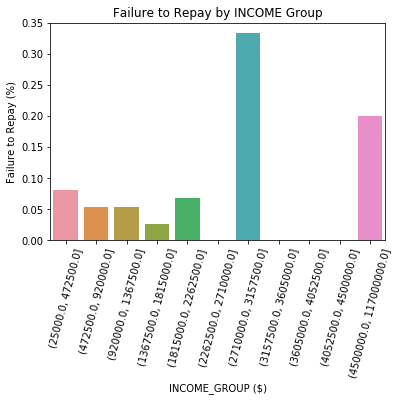

In [10]:
px=df2_INCOME_GROUP["INCOME_GROUP"]
py=df2_INCOME_GROUP["TARGET"]
sns.barplot(px, py)
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('INCOME_GROUP ($)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by INCOME Group');

In [11]:
TARGET_1_num= app_train[(app_train["TARGET"]==1)]
print (TARGET_1_num.shape)
#df3=app_train[(app_train["AMT_INCOME_TOTAL"] > 2710000) & (app_train["AMT_INCOME_TOTAL"] <= 3157500)]
df3=app_train[(app_train["AMT_INCOME_TOTAL"] > 1815000) & (app_train["TARGET"] == 1)]
df3=df3[df3["AMT_INCOME_TOTAL"] > 1815000]
df3.head()

(24825, 124)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,ages
12840,114967,1,0,F,0,1,1,117000000.0,562491.0,26194.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,34.561644
41725,148308,1,0,M,1,1,1,1890000.0,781920.0,61906.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,36.172603
248159,387126,1,0,F,1,1,1,3150000.0,900000.0,48825.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,37.446575
248970,388040,1,0,M,1,1,0,1890000.0,900000.0,57649.5,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False,45.380822
